<a href="https://colab.research.google.com/github/Jheim12/PPHA30456/blob/main/lab_08/ML_lab8_walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

In [2]:
def plot_svm(model, X, y, x_label=None, y_label=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.coolwarm, s=30, edgecolors='k')
    plt.xlabel(x_label, fontsize= 16)
    plt.ylabel(y_label, fontsize= 16)    

## Section 1

In [3]:
# import some data to play with
iris = datasets.load_iris()
# Taking only Versicolor and Virginica class. 
# Note the classical support vector machine classifies between 2 categories 
X = iris.data[50:150, :2]
y = iris.target[50:150]

In [4]:
# Split and standardize
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=2)
scaler = StandardScaler()
scaler.fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

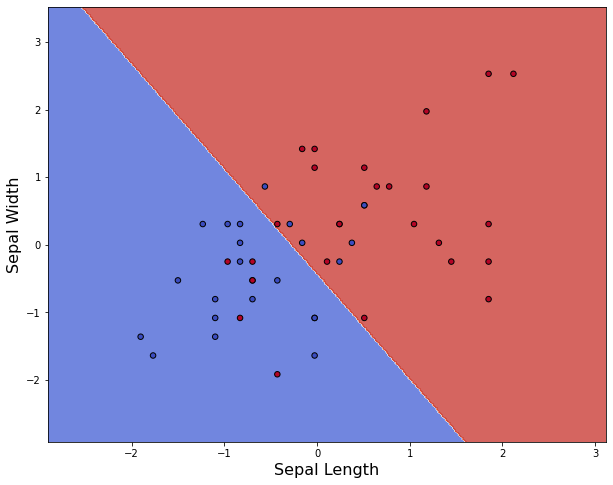

In [5]:
# Hyperparamter of 0.1; C is the hyperparameter
model = SVC(C=0.1, kernel='linear').fit(Xs_train,y_train)

plot_svm(model, Xs_train, y_train, 'Sepal Length', 'Sepal Width')

In [6]:
# Print misclassification error
1 - model.score(Xs_train, y_train)

0.24

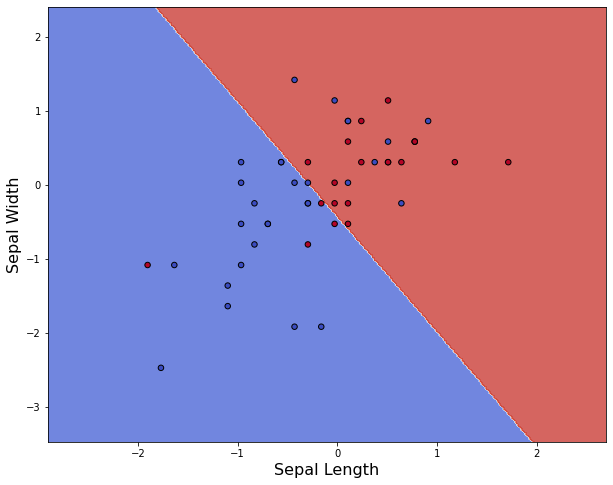

In [7]:
# Out of sample performance 
y_test_pred = model.predict(Xs_test)
plot_svm(model, Xs_test, y_test, 'Sepal Length', 'Sepal Width')

In [8]:
# Print misclassification error
1 - metrics.accuracy_score(y_test, y_test_pred)

0.33999999999999997

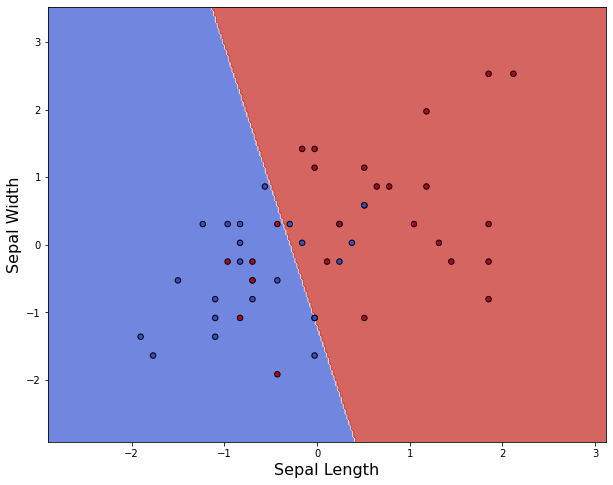

In [9]:
# Hyperparameter of 10
model = SVC(C=10, kernel='linear').fit(Xs_train,y_train)

plot_svm(model, Xs_train, y_train, 'Sepal Length', 'Sepal Width')

In [10]:
# Print misclassification error
print(1 - model.score(Xs_train, y_train))

0.24


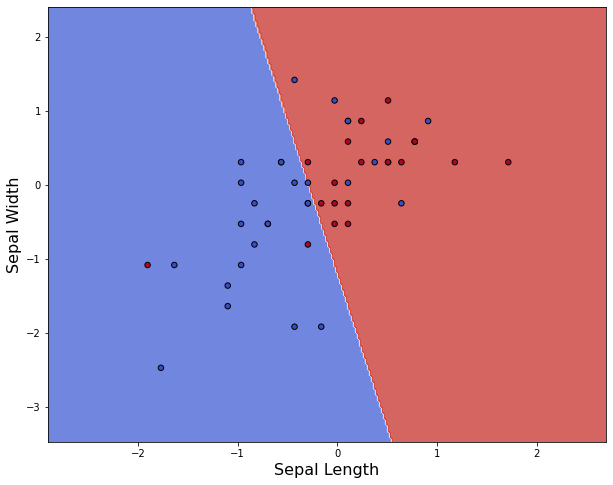

In [11]:
# Out of sample performance 
y_test_pred = model.predict(Xs_test)
plot_svm(model, Xs_test, y_test, 'Sepal Length', 'Sepal Width')

In [12]:
# Print misclassification error
1 - metrics.accuracy_score(y_test, y_test_pred)

0.28

## Section 2

In [13]:
# import data
vote_df = pd.read_csv("https://raw.githubusercontent.com/Jheim12/PPHA30456/main/lab_08/vote.csv")
work_df = pd.read_csv("https://raw.githubusercontent.com/Jheim12/PPHA30456/main/lab_08/work.csv")

In [14]:
work_df.head()

,prtage,pesex,ptdtrace,pehspnon,prcitshp,peeduca,work
0,35,MALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",HIGH SCHOOL GRAD-DIPLOMA OR,flexible
1,41,MALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",HIGH SCHOOL GRAD-DIPLOMA OR,flexible
2,53,MALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",BACHELOR'S DEGREE,not flexible
3,21,FEMALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",SOME COLLEGE BUT NO DEGREE,flexible
4,45,FEMALE,Black Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",SOME COLLEGE BUT NO DEGREE,flexible


In [15]:
vote_df.head()

,prtage,pesex,ptdtrace,pehspnon,prcitshp,peeduca,vote
0,19,FEMALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",SOME COLLEGE BUT NO DEGREE,vote
1,35,MALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED","MASTER'S DEGREE (EX: MA, MS,",vote
2,48,MALE,White Only,HISPANIC,"FOREIGN BORN, U.S. CITIZEN BY",5TH OR 6TH GRADE,vote
3,55,MALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",BACHELOR'S DEGREE,did not vote
4,25,FEMALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",SOME COLLEGE BUT NO DEGREE,vote


In [16]:
# Map labels to 0 and 1
work_mapper = {'flexible': 1, "not flexible": 0}
vote_mapper = {'vote': 1, "did not vote": 0}

In [17]:
work_df['work'] = work_df['work'].replace(work_mapper)
vote_df['vote'] = vote_df['vote'].replace(vote_mapper)

In [18]:
# Convert work_df citizenship categories to dummies and check output
work_df = pd.get_dummies(work_df, columns=['prcitshp'])
work_df.columns

Index(['prtage', 'pesex', 'ptdtrace', 'pehspnon', 'peeduca', 'work',
       'prcitshp_FOREIGN BORN, NOT A CITIZEN OF',
       'prcitshp_FOREIGN BORN, U.S. CITIZEN BY',
       'prcitshp_NATIVE, BORN ABROAD OF',
       'prcitshp_NATIVE, BORN IN PUERTO RICO OR',
       'prcitshp_NATIVE, BORN IN THE UNITED'],
      dtype='object')

In [19]:
# Convert vote_df citizenship categories to dummies and check output
vote_df = pd.get_dummies(vote_df, columns=['prcitshp']) 
vote_df.columns 

Index(['prtage', 'pesex', 'ptdtrace', 'pehspnon', 'peeduca', 'vote',
       'prcitshp_FOREIGN BORN, U.S. CITIZEN BY',
       'prcitshp_NATIVE, BORN ABROAD OF',
       'prcitshp_NATIVE, BORN IN PUERTO RICO OR',
       'prcitshp_NATIVE, BORN IN THE UNITED'],
      dtype='object')

In [20]:
# Add column of zeros to vote_df since it has one less category in citizenship
vote_df["prcitshp_FOREIGN BORN, NOT A CITIZEN OF"] = 0
vote_df.columns 

Index(['prtage', 'pesex', 'ptdtrace', 'pehspnon', 'peeduca', 'vote',
       'prcitshp_FOREIGN BORN, U.S. CITIZEN BY',
       'prcitshp_NATIVE, BORN ABROAD OF',
       'prcitshp_NATIVE, BORN IN PUERTO RICO OR',
       'prcitshp_NATIVE, BORN IN THE UNITED',
       'prcitshp_FOREIGN BORN, NOT A CITIZEN OF'],
      dtype='object')

In [21]:
# Check if both are now same
print(len(work_df.columns))
print(len(vote_df.columns))

11
11


In [22]:
print(work_df.ptdtrace.unique())
print(vote_df.ptdtrace.unique())

['White Only' 'Black Only' 'White-AI' 'Black-AI' 'Asian Only'
 'White-Asian' 'Hawaiian/Pacific Islander Only' 'Asian-HP'
 'White-Hawaiian' 'American Indian, Alaskan' 'White-Black' '2 or 3 Races'
 '4 or 5 Races']
['White Only' 'Black Only' 'Hawaiian/Pacific Islander Only' 'Asian Only'
 'American Indian, Alaskan' 'White-AI' 'Black-AI' 'W-B-AI' '2 or 3 Races'
 'White-Asian' 'Asian-HP' 'White-Black' 'White-Hawaiian' 'W-A-HP'
 'Black-Asian']


In [23]:
work_df = pd.get_dummies(work_df, columns=['ptdtrace'])
vote_df = pd.get_dummies(vote_df, columns=['ptdtrace'])
print(len(work_df.columns))
print(len(vote_df.columns))
vote_df['4 or 5 Races'] = 0
work_df['W-B-AI'] = 0
work_df['W-A-HP'] = 0
work_df['Black-Asian'] = 0

23
25


In [24]:
# For remaining columns
work_df = pd.get_dummies(work_df, columns=['pesex'])
vote_df = pd.get_dummies(vote_df, columns=['pesex'])
work_df = pd.get_dummies(work_df, columns=['pehspnon'])
vote_df = pd.get_dummies(vote_df, columns=['pehspnon'])
work_df = pd.get_dummies(work_df, columns=['peeduca'])
vote_df = pd.get_dummies(vote_df, columns=['peeduca'])
print(len(work_df.columns))
print(len(vote_df.columns))

43
43


In [25]:
# Alternatively: We can also map to ordinal values (optional)
# mapper = {'HIGH SCHOOL GRAD-DIPLOMA OR':9,
# "BACHELOR'S DEGREE":13,
# 'SOME COLLEGE BUT NO DEGREE':10,
# "MASTER'S DEGREE (EX: MA, MS,":14,
# 'ASSOCIATE DEGREE-OCCUPATIONAL/':11,
# 'ASSOCIATE DEGREE-ACADEMIC':12,
# '11TH GRADE':7,
# '10TH GRADE':6,
# 'PROFESSIONAL SCHOOL DEG':15,
# '9TH GRADE':5,
# 'DOCTORATE DEGREE':16,
# '7TH OR 8TH GRADE':4,
# '12TH GRADE NO DIPLOMA':8,
# '5TH OR 6TH GRADE':3,
# '1ST, 2ND, 3RD OR 4TH GRADE':2,
# 'LESS THAN 1ST GRADE':1,
# }

# work_df['peeduca'] = work_df['peeduca'].replace(mapper)

In [26]:
X = work_df.drop('work', axis = 1)
y = work_df['work']

In [27]:
# Define the set of parameters to form combinations in grid search
parameters = {'kernel':('linear','poly', 'sigmoid'), 
              'C':[0.1, 1, 10]}

# Run each combination using GridSearch CV
# By specifying cv = fkf, GridSearchCV will run 5-fold CV that you specified on each combination
from sklearn.model_selection import GridSearchCV
svc = SVC()
fkf = KFold(n_splits=5, random_state=10, shuffle=True)
clf = GridSearchCV(svc, parameters, cv = fkf)

clf.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ('linear', 'poly', 'sigmoid')})

In [28]:
# Print out the mean_score for each combination
# GridSearchCV uses accuracy scores by default
for params, mean_score, rank in zip(clf.cv_results_["params"], clf.cv_results_["mean_test_score"], clf.cv_results_["rank_test_score"]):
    print(params, mean_score, rank)
    
# The fourth set (C = 1, Kernel = 'poly') gives us the best result

{'C': 0.1, 'kernel': 'linear'} 0.8630000000000001 4
{'C': 0.1, 'kernel': 'poly'} 0.865 3
{'C': 0.1, 'kernel': 'sigmoid'} 0.347 7
{'C': 1, 'kernel': 'linear'} 0.8623999999999998 5
{'C': 1, 'kernel': 'poly'} 0.8662000000000001 1
{'C': 1, 'kernel': 'sigmoid'} 0.2852 8
{'C': 10, 'kernel': 'linear'} 0.8623999999999998 5
{'C': 10, 'kernel': 'poly'} 0.8657999999999999 2
{'C': 10, 'kernel': 'sigmoid'} 0.2834 9


In [29]:
max(clf.cv_results_['mean_test_score'])

0.8662000000000001

### Section 2.4

In order to impute the work flexibility measure for the main analysis, you need to
   1) Fit the model with the tuned values of C and the kernal that minimize the 5FCV error rate on the work_df data
   2) Create X and y from vote_df (don't forget to standardize)
   3) Predict the imputed work flexibility measure for the vote_df data
   4) Calculate summary statistics for the imputed measure 

This is left as an exercise for the mini-project.  Instead, we'll create a variable that's all random noise (and no signal) to illustrate what happens if our regression if our prediction performs poorly.  Note that this would be the most extreme case of a poor prediction.  

In [30]:
# Generate a random imputed work measure instead of using our prediction.  
# Since the flexible work schedule variable is binary, this should be 0 or 1 at random
np.random.seed(23)
imputed_work = np.random.randint(0,2, size=len(vote_df))
vote_df["imputed_work"] = imputed_work

In [31]:
# Calculate summary statistics for the imputed measure
vote_df["imputed_work"].describe()

count    5000.000000
mean        0.494400
std         0.500019
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: imputed_work, dtype: float64

Now let's run the regression we care about and have worked so hard to set up:  voting status on the imputed work schedule!  

In [32]:
import statsmodels.formula.api as smf
result = smf.ols('vote ~  imputed_work + prtage + np.power(prtage, 2) + pesex_FEMALE', data = vote_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   vote   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1444.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:42:37   Log-Likelihood:                -1700.8
No. Observations:                5000   AIC:                             3412.
Df Residuals:                    4995   BIC:                             3444.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.7238    

Note that the coefficient on imputed_work is close to zero and is not statistically significant.  This is unsurprising because the imputed work variable was generated at random.  It contains no information!  

As previously mentioned, this is an extreme case of a poor prediction.  But all predictions contain some true information (signal) and some randomness (noise).  Whenever an explanatory variable is mismeasured, it will lead to measurement error.  If that measurement error is random (uncorrelated with the true dependent and independent variables, as well as the error term in the regression), it will lead to what's known as "attenuation bias" in the estimates.  In that case, the coefficient estimates will be attenuated (shrink) towards zero.  

This is exactly what we see in our extreme case!  Less extreme cases (e.g., imperfect predictions) can still attenuate estimates towards zero, just not all the way.  

So we'll want to correct for this issue.  Luckily, Lewbel (2007) provides a formula we can use in our context to correct for this attenuation bias.

In [33]:
# Before we do, let's store our estimate of the coefficient on the imputed work measure
# We'll need it for our correction
work_vote_relationship = result.params[1]

### Section 2.5: Bias Correction

The M scaling function comes from a Lewbel (2007) Econometrica paper (https://doi.org/10.1111/j.1468-0262.2006.00756.x), the paper is dense, but the intuition is that you can't just treat a predicted variable as if it's data.  There's measurement error that comes from the imprecision in the prediction.  The paper derives the effect of that measurement error in the case of "the conditional average effect of a binary treatment or policy on some outcome where treatment may be misclassified."

In essence, since the work variable is a mix of signal and noise, it's effect on voting is attenuated (closer to zero) than if it had been all signal and no noise.  Our regression illustrates this attenuation effect.

The M function is a correction for the amount of noise that biases the estimate.

In [34]:
# First, let's define the attenuation bias correction formula
def compute_M(a,b):
    return 1 / (1 - 2 * b) * (1 - (1 - b) * b / a - (1 - b) * b / (1 - a))

In [35]:
# Next, let's calculate the inputs to the bias correction
# For the value of a, find the proportion of imputed work schedules that are flexible
a = sum(imputed_work)/(imputed_work.size)
print(a)

0.4944


In [36]:
# For the value of b, use the cross-validation error rate 
# This is left as an exercise for the mini-project, so we're just hard coding a value
b = 1 - max(clf.cv_results_['mean_test_score'])
print(b)

0.13379999999999992


In [37]:
M = compute_M(a,b)
print(M)

0.7323205897661076


In [38]:
work_vote_bias_correction = work_vote_relationship / M
print(work_vote_bias_correction)

0.0031906074346967996


It isn't immediately obvious because our estimated coefficient (0.0023) is so close to zero (because of the attenuation bias), but the correction moves our estimate away from zero (makes it larger).  